# Final Exam (part 3) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Vincent Noguera

## 3. Fourier analysis: removing Herringbone MRI artifacts

This problem consist of using Fourier analysis to remove undesired Herringbone artifacts from magnetic resonance images (MRI).

The file provided below **herringbone-mri-artifact.jpg** contains a brain MRI image affected by the Herringbone artifact. This artifact can be produced by electromagnetic spikes by gradient coils, a fluctuating power supply, or radiofrequency pulse discrepancies during MRI scanning. In real space, the regularly spaced stripes resemble the appearance of a fabric with a herringbone pattern (which gives the artifact its name). In this image, the artifact covers the entire image with multiple diagonal stripes, which would be seen as spike artifacts in Fourier space. Your task is to remove them.

#### Download the image file:
https://github.com/wbandabarragan/physics-teaching-data/blob/main/2D-data/herringbone-mri-artifact.jpg

#### Reference:
Case courtesy of Frank Gaillard, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/19695?lang=us">rID: 19695</a>


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from PIL import Image, ImageDraw


#### Image I/O:

(a) Inspect the file. Then, write a python function that reads the data from the **herringbone-mri-artifact.jpg** file, and returns its 3 layers (channels) as numpy arrays.

(b) Call your function, select a single channel and make a map of it. Identify and label the Herringbone artifacts on the image using small arrows.




In [6]:
image = io.imread("herringbone-mri-artifact.jpg")

print(type(image))

print(image.shape)

print(np.max(image), np.min(image))

<class 'numpy.ndarray'>
(1175, 1006, 3)
255 14


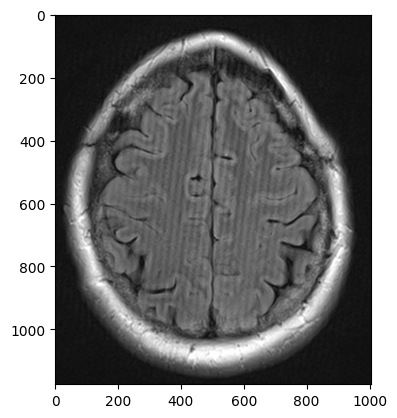

In [9]:
plt.figure()

plt.imshow(image)

plt.show()

In [7]:
# Use indexing:

imageR = image[:, :, 0]
imageG = image[:, :, 1]
imageB = image[:, :, 2]

print(imageR.shape, imageG.shape, imageB.shape)

(1175, 1006) (1175, 1006) (1175, 1006)


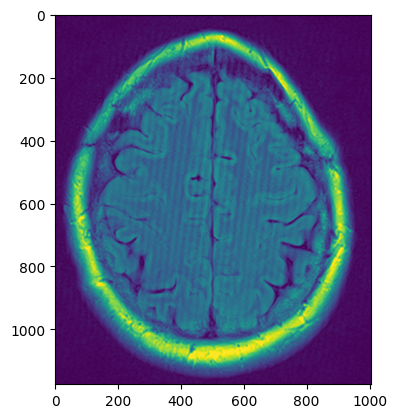

In [391]:
plt.imshow(imageB)

#### 2D Fourier transform:

(c) Create a function that Fourier transforms this image and returns the Fourier image and the correct frequencies.

(d) Call your function in (c), and make a two-panel figure with the original image on the left and a labeled 2D plot of its Fourier image on the right. Identify and label the Herringbone artifacts on the Fourier image.

(e) Briefly comment, how do the image artifacts look in Fourier space? 


In [159]:
fourier_2 = np.fft.fft2(imageB)

shifted_fourier_2 = np.fft.fftshift(fourier_2)

norm_fourier_2 = np.abs(shifted_fourier_2)

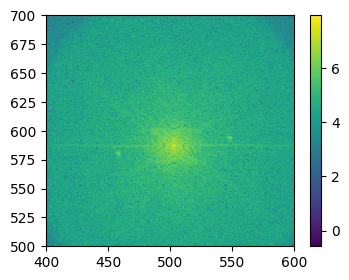

In [405]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis")
# plt.gca().invert_yaxis()
plt.colorbar(Z1)
plt.xlim(400,600)
plt.ylim(500,700)
plt.show()

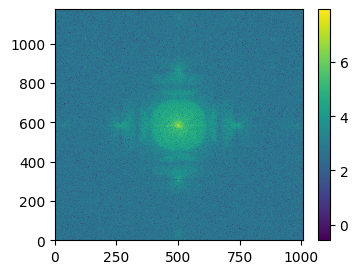

In [406]:
plt.figure(figsize = (4,3))

Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis")
# plt.gca().invert_yaxis()
plt.colorbar(Z1)
# plt.xlim(400,600)
# plt.ylim()
plt.show()

In [393]:
print(shifted_fourier_2.shape[1])
print(len(shifted_fourier_2))
print(norm_fourier_2.shape[0])

1006
1175
1175


In [394]:
image_centre = [shifted_fourier_2.shape[0]//2, shifted_fourier_2.shape[1]//2]

print(image_centre)

radius_centre = 10 #pixels

[587, 503]


In [408]:
mask_1 = Image.new(mode="RGB", size=(shifted_fourier_2.shape[1], shifted_fourier_2.shape[0]))

draw = ImageDraw.Draw(mask_1)

draw.ellipse([(450, 575), (470, 600)], fill=(255, 0, 0), outline=(0, 0, 0))

1 0


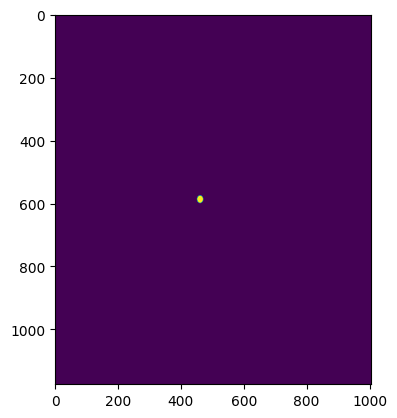

In [410]:
# %matplotlib inline
plt.imshow(mask_1)
# plt.gca().invert_yaxis()

print(np.max(mask_1), np.min(mask_1))

In [413]:
# mask_1 = np.array(mask_1)[:,:,0]//255

print(np.unique(mask_1))

[0 1]


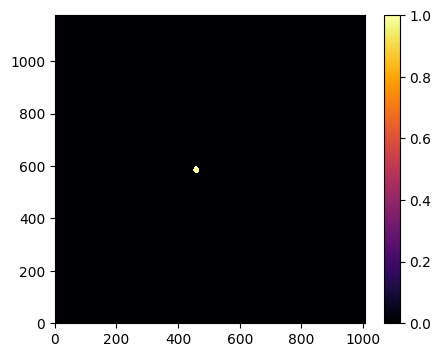

In [414]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_1, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

/tmp/ipykernel_193557/2440686442.py:4: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")
/tmp/ipykernel_193557/2440686442.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


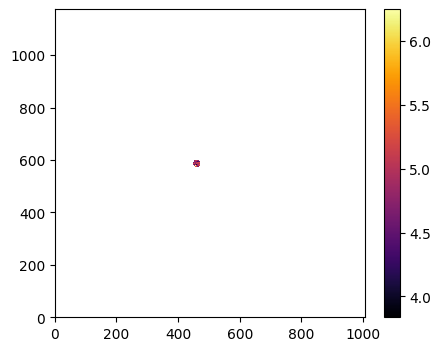

In [415]:
masked_fourier_3 = shifted_fourier_2*mask_1
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [416]:
inv_filter_3 = np.fft.ifftshift(masked_fourier_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

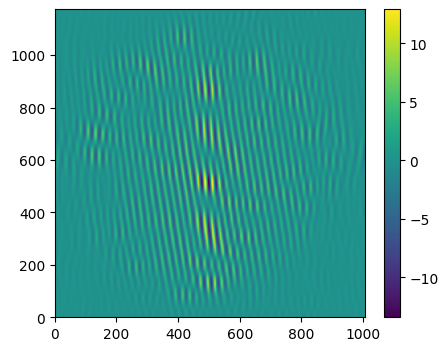

In [417]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)


plt.show()

In [418]:
mask_2 = - mask_1 + 1

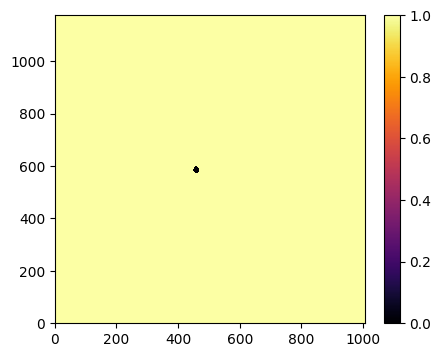

In [419]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_2, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [420]:
masked_fourier_3_2 = shifted_fourier_2*mask_2

In [ ]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

/tmp/ipykernel_193557/793016055.py:3: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")


In [ ]:
inv_filter_3_2 = np.fft.ifftshift(masked_fourier_3_2)
inv_filter_3_2 = np.fft.ifft2(inv_filter_3_2)

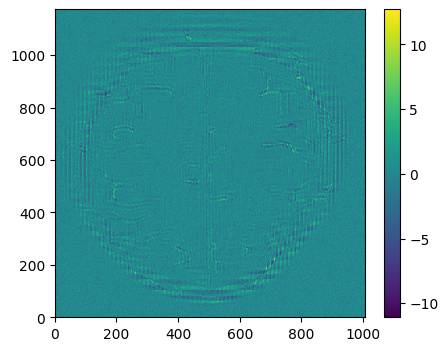

In [390]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3_2.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

In [122]:
#Let's try a plot of what we think that is the surface that we want to remove, a cirlce in each corner:

image_size = (shifted_fourier_2.shape[1], shifted_fourier_2.shape[0])
print(image_size)

radius_centre = (shifted_fourier_2.shape[1]+shifted_fourier_2.shape[0])//2
radius_centre = radius_centre//2

mask_1 = Image.new(mode="RGB", size=image_size, color=(255, 255, 255))

# Draw object
draw = ImageDraw.Draw(mask_1)

# Coordinates for the centers of the quarter-circles (corners)
corner_centers = [
    (0, 0),  # Top-left corner
    (image_size[0], 0),  # Top-right corner
    (0, image_size[1]),  # Bottom-left corner
    (image_size[0], image_size[1])  # Bottom-right corner
]

# # Draw each quarter-circle in the corners
# for center in corner_centers:
#     if center == (0, 0):  # Top-left corner (top-left quarter)
#         bbox = (center[0], center[1], center[0] + radius_centre, center[1] + radius_centre)
#         draw.pieslice(bbox, start=90, end=180, fill=(255, 0, 0), outline=(0, 0, 0))
#     elif center == (image_size[0], 0):  # Top-right corner (top-right quarter)
#         bbox = (center[0] - radius_centre, center[1], center[0], center[1] + radius_centre)
#         draw.pieslice(bbox, start=0, end=90, fill=(0, 255, 0), outline=(0, 0, 0))
#     elif center == (0, image_size[1]):  # Bottom-left corner (bottom-left quarter)
#         bbox = (center[0], center[1] - radius_centre, center[0] + radius_centre, center[1])
#         draw.pieslice(bbox, start=180, end=270, fill=(0, 0, 255), outline=(0, 0, 0))
#     elif center == (image_size[0], image_size[1]):  # Bottom-right corner (bottom-right quarter)
#         bbox = (center[0] - radius_centre, center[1] - radius_centre, center[0], center[1])
#         draw.pieslice(bbox, start=270, end=360, fill=(255, 255, 0), outline=(0, 0, 0))


# # Draw each quarter-circle in the corners
# for center in corner_centers:
#     if center == (0, 0):  # Top-left corner (top-left quarter)
#         bbox = (center[0], center[1], center[0] + radius_centre, center[1] + radius_centre)
#         draw.pieslice(bbox, start=0, end=90, fill=(255, 0, 0), outline=(0, 0, 0))
#     elif center == (image_size[0], 0):  # Top-right corner (top-right quarter)
#         bbox = (center[0] - radius_centre, center[1], center[0], center[1] + radius_centre)
#         draw.pieslice(bbox, start=90, end=180, fill=(0, 255, 0), outline=(0, 0, 0))
#     elif center == (0, image_size[1]):  # Bottom-left corner (bottom-left quarter)
#         bbox = (center[0], center[1] - radius_centre, center[0] + radius_centre, center[1])
#         draw.pieslice(bbox, start=270, end=360, fill=(0, 0, 255), outline=(0, 0, 0))
#     elif center == (image_size[0], image_size[1]):  # Bottom-right corner (bottom-right quarter)
#         bbox = (center[0] - radius_centre, center[1] - radius_centre, center[0], center[1])
#         draw.pieslice(bbox, start=180, end=270, fill=(255, 255, 0), outline=(0, 0, 0))
# Define the color for the quarter-circles: black (0)
circle_color = 0  # Black (binary color)

# Draw each quarter-circle in the corners with the same color (black)
for center in corner_centers:
    if center == (0, 0):  # Top-left corner (top-left quarter)
        bbox = (center[0], center[1], center[0] + radius_centre, center[1] + radius_centre)
        draw.pieslice(bbox, start=0, end=90, fill=circle_color, outline=circle_color)
    elif center == (image_size[0], 0):  # Top-right corner (top-right quarter)
        bbox = (center[0] - radius_centre, center[1], center[0], center[1] + radius_centre)
        draw.pieslice(bbox, start=90, end=180, fill=circle_color, outline=circle_color)
    elif center == (0, image_size[1]):  # Bottom-left corner (bottom-left quarter)
        bbox = (center[0], center[1] - radius_centre, center[0] + radius_centre, center[1])
        draw.pieslice(bbox, start=270, end=360, fill=circle_color, outline=circle_color)
    elif center == (image_size[0], image_size[1]):  # Bottom-right corner (bottom-right quarter)
        bbox = (center[0] - radius_centre, center[1] - radius_centre, center[0], center[1])
        draw.pieslice(bbox, start=180, end=270, fill=circle_color, outline=circle_color)

# Show the resulting binary image
# mask_1.show()

(1006, 1175)
Opening "/tmp/tmp3xld5a50.PNG" with Okular  (image/png)


QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700
QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700
Icon theme "breeze" not found.
Icon theme "breeze" not found.


In [152]:
#Let's try a plot of what we think that is the surface that we want to remove, a cirlce in each corner:

image_size = (shifted_fourier_2.shape[1], shifted_fourier_2.shape[0])
print(image_size)

radius_centre = (shifted_fourier_2.shape[1]+shifted_fourier_2.shape[0])//2
radius_centre = radius_centre//2



# Create a blank white image (binary: white is 255, black is 0)
mask_1 = Image.new(mode="1", size=image_size, color=1)  # mode="1" is for 1-bit pixels (binary)

# Draw object
draw = ImageDraw.Draw(mask_1)

# Coordinates for the centers of the quarter-circles (corners)
corner_centers = [
    (0, 0),  # Top-left corner
    (image_size[0], 0),  # Top-right corner
    (0, image_size[1]),  # Bottom-left corner
    (image_size[0], image_size[1])  # Bottom-right corner
]

# Define the color for the quarter-circles: black (0)
circle_color = 0  # Black (binary color)

# Draw each quarter-circle in the corners with the same color (black)
for center in corner_centers:
    if center == (0, 0):  # Top-left corner (top-left quarter)
        # Define the bounding box for the top-left corner (full quarter-circle in the corner)
        # bbox = (center[0], center[1],500, radius_centre)
        draw.pieslice(xy=[(-image_size[0],-image_size[1]),(radius_centre,radius_centre)], start=0, end=90, fill=circle_color, outline=circle_color)
    elif center == (image_size[0], 0):  # Top-right corner (top-right quarter)
        # Define the bounding box for the top-right corner (full quarter-circle in the corner)
        bbox = (center[0] - radius_centre, center[1], center[0], center[1] + radius_centre)
        draw.pieslice(xy=[(-image_size[0]/2,-image_size[1]/2), (image_size[0],image_size[1])], start=90, end=180, fill=circle_color, outline=circle_color)
    elif center == (0, image_size[1]):  # Bottom-left corner (bottom-left quarter)
        # Define the bounding box for the bottom-left corner (full quarter-circle in the corner)
        bbox = (center[0], center[1] - radius_centre, center[0] + radius_centre, center[1])
        draw.pieslice(bbox, start=270, end=360, fill=circle_color, outline=circle_color)
    elif center == (image_size[0], image_size[1]):  # Bottom-right corner (bottom-right quarter)
        # Define the bounding box for the bottom-right corner (full quarter-circle in the corner)
        bbox = (center[0] - radius_centre, center[1] - radius_centre, center[0], center[1])
        draw.pieslice(bbox, start=180, end=270, fill=circle_color, outline=circle_color)

# Show the resulting binary image
# mask_1.show()


(1006, 1175)


True False


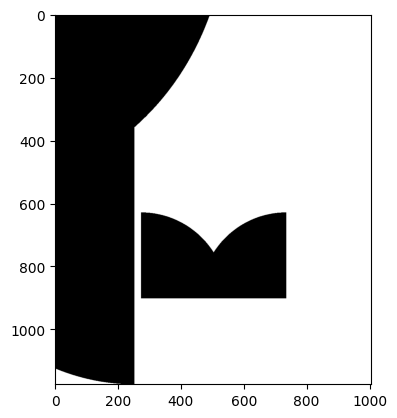

In [153]:
# %matplotlib inline
plt.imshow(mask_1)
# plt.gca().invert_yaxis()
print(np.max(mask_1), np.min(mask_1))

In [124]:
mask_1 = np.array(mask_1)[:,:,0]//255

print(np.unique(mask_1))

[0 1]


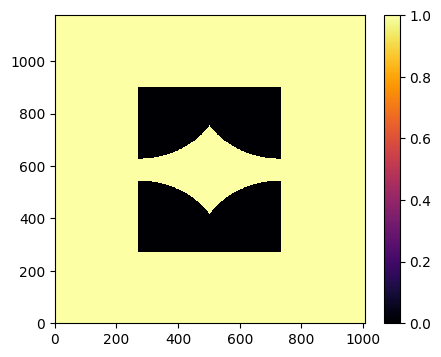

In [125]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(mask_1, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [132]:
from PIL import Image, ImageDraw

# Image parameters
distance_x = 1006  # Horizontal size of the rectangle (width)
distance_y = 1175  # Vertical size of the rectangle (height)

# The radius of the quarter-circle: Half the size of the smaller dimension
radius_centre = min(distance_x, distance_y) // 2

# Circle color (black for binary image)
circle_color = 0  # Black (binary color)

# Create a blank binary image with the size matching the distances (distance_x, distance_y)
mask_1 = Image.new(mode="1", size=(distance_x, distance_y), color=1)

# Draw object
draw = ImageDraw.Draw(mask_1)

# Top-left corner (quarter-circle)
xy_top_left = [(0, 0), (radius_centre, radius_centre)]
draw.pieslice(xy=xy_top_left, start=0, end=90, fill=circle_color, outline=circle_color)

# Top-right corner (quarter-circle)
xy_top_right = [(distance_x - radius_centre, 0), (distance_x, radius_centre)]
draw.pieslice(xy=xy_top_right, start=90, end=180, fill=circle_color, outline=circle_color)

# Bottom-left corner (quarter-circle)
xy_bottom_left = [(0, distance_y - radius_centre), (radius_centre, distance_y)]
draw.pieslice(xy=xy_bottom_left, start=270, end=360, fill=circle_color, outline=circle_color)

# Bottom-right corner (quarter-circle)
xy_bottom_right = [(distance_x - radius_centre, distance_y - radius_centre), (distance_x, distance_y)]
draw.pieslice(xy=xy_bottom_right, start=180, end=270, fill=circle_color, outline=circle_color)

# Show the resulting binary image
mask_1.show()

# Optionally, save the image
# mask_1.save('quarter_circles_binary.png')



Opening "/tmp/tmpjfq78t1_.PNG" with Okular  (image/png)


QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700
QStandardPaths: wrong permissions on runtime directory /run/user/1000/, 0755 instead of 0700
Icon theme "breeze" not found.
Icon theme "breeze" not found.


/tmp/ipykernel_193557/2440686442.py:4: RuntimeWarning: divide by zero encountered in log10
  Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")
/tmp/ipykernel_193557/2440686442.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(Z1)


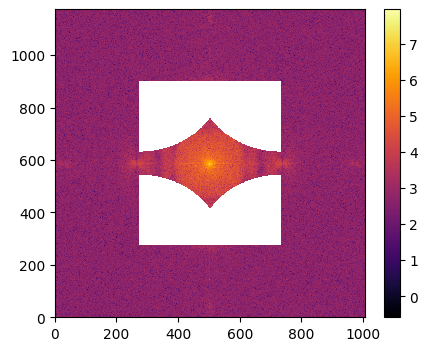

In [126]:
masked_fourier_3 = shifted_fourier_2*mask_1
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [128]:
inv_filter_3 = np.fft.ifftshift(masked_fourier_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

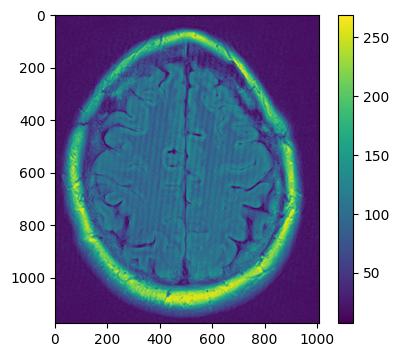

In [130]:
plt.figure(figsize = (5,4))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)


plt.show()

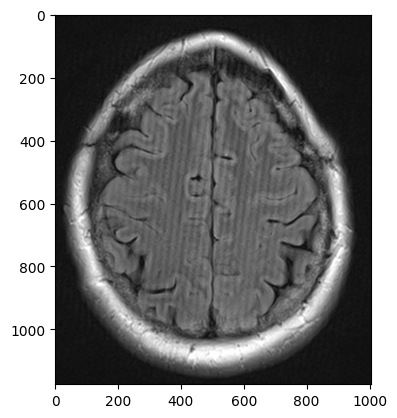

In [131]:

plt.imshow(image)


In [127]:
mask_1 = np.array(mask_1)[:,:,0]//255

print(np.unique(mask_1))

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

255 0


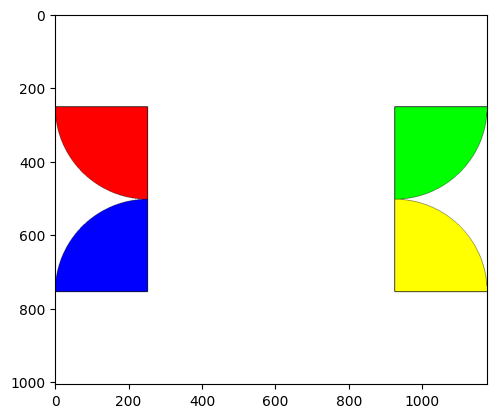

In [30]:
# %matplotlib inline
plt.imshow(mask_1)

print(np.max(mask_1), np.min(mask_1))


#### Masking and filtering:

(f) Create an appropriate mask for the Fourier image that matches the features associated with the Herringbone artifacts. Plot the mask.

(g) Use your mask from (f) to remove the Herringbone artifacts from the Fourier image.

(h) Inverse Fourier transform the masked Fourier image and make a two-panel figure showing the original image on the left and the new filtered image (without the Herringbone artifacts) on the right.



#### Artifact-free image:

(i) Create a function that combines all the previous steps. The function should receive an input image channel, apply the Fourier filter to it and return the original and the filtered channel images. Call and apply your filter function to the other two channels of the **herringbone-mri-artifact.jpg** image.

(j) Using the output clean images from (i), reconstruct the 3-layered image and make a two panel figure showing the original 3-layered image and your new artifact-free 3-layered image. Briefly comment on your results.